SVM Model

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [34]:
data = pd.read_csv("/content/final_data1.csv")
data.head(5)

,Artist,Track,SpotifyID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms,billboard_hit
0,Sonora Santanera,Amor De Cabaret,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,8.0,183027,0
1,JennyAnyKind,Young Boy Blues,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,0.0,218907,0
2,Casual,I Didn't Mean To,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,0.0,218933,0
3,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,5.0,267640,0
4,Tweeterfriendly Music,Drop of Rain,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,7.0,189560,0


In [35]:
data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms,billboard_hit
count,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,1.463700e+04,14637.000000
mean,0.600834,0.650782,-7.782832,0.097318,0.232584,0.085688,0.198051,0.525100,120.638107,3.305049,2.406734e+05,0.627041
std,0.167885,0.216254,4.083115,0.115077,0.282137,0.235613,0.170423,0.245209,29.838461,3.690942,9.078982e+04,0.483608
min,0.000000,0.000020,-54.909000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,6.477000e+03,0.000000
25%,0.497000,0.509000,-9.464000,0.034600,0.017600,0.000000,0.092900,0.330000,97.002000,0.000000,2.004930e+05,0.000000
50%,0.615000,0.684000,-6.818000,0.049100,0.099300,0.000005,0.129000,0.531000,119.838000,2.000000,2.317730e+05,1.000000
75%,0.722000,0.822000,-5.088000,0.105000,0.361000,0.001710,0.258000,0.724000,139.821000,7.000000,2.689330e+05,1.000000
max,0.986000,1.000000,0.316000,0.956000,0.996000,0.991000,0.997000,0.992000,245.941000,11.000000,4.802553e+06,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            14637 non-null  object 
 1   Track             14637 non-null  object 
 2   SpotifyID         14637 non-null  object 
 3   danceability      14637 non-null  float64
 4   energy            14637 non-null  float64
 5   loudness          14637 non-null  float64
 6   speechiness       14637 non-null  float64
 7   acousticness      14637 non-null  float64
 8   instrumentalness  14637 non-null  float64
 9   liveness          14637 non-null  float64
 10  valence           14637 non-null  float64
 11  tempo             14637 non-null  float64
 12  Key_mode_Ratio    14637 non-null  float64
 13  duration_ms       14637 non-null  int64  
 14  billboard_hit     14637 non-null  int64  
dtypes: float64(10), int64(2), object(3)
memory usage: 1.7+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


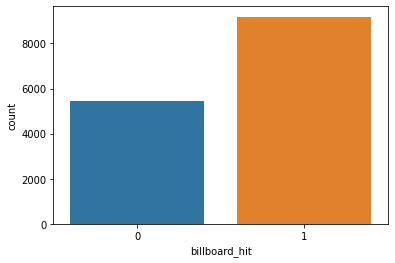

In [37]:
sns.countplot(data['billboard_hit'], label = "Count")

In [38]:
y = data['billboard_hit']
x = data.drop(['billboard_hit','Track','Artist','SpotifyID'],axis=1)

In [39]:

x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms
0,0.699,0.519,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,8.0,183027
1,0.458,0.570,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,0.0,218907
2,0.751,0.549,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,0.0,218933
3,0.456,0.472,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,5.0,267640
4,0.498,0.300,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,7.0,189560
...,...,...,...,...,...,...,...,...,...,...,...
14632,0.893,0.523,-11.157,0.0986,0.003360,0.000500,0.0833,0.949,132.737,1.0,260441
14633,0.867,0.911,-7.375,0.1150,0.023900,0.000000,0.0491,0.675,124.810,0.0,215040
14634,0.763,0.505,-13.669,0.0753,0.179000,0.001070,0.0497,0.960,105.632,0.0,383333
14635,0.834,0.485,-13.040,0.0453,0.047800,0.000051,0.1030,0.929,107.598,11.0,368467


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14632    1
14633    1
14634    1
14635    1
14636    1
Name: billboard_hit, Length: 14637, dtype: int64

In [41]:
#Split the dataset into both training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0 )

In [42]:
# train the model on train set
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svc = SVC()
model = SVC()
model.fit(x_train, y_train)
  
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.26      0.38      1311
           1       0.70      0.94      0.80      2349

    accuracy                           0.70      3660
   macro avg       0.70      0.60      0.59      3660
weighted avg       0.70      0.70      0.65      3660



In [43]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [44]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(x_train)
accuracy_score(y_train, y_pred)

0.631866630226838

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32))
x_test_scaled = scaler.transform(x_test.astype(np.float32))
lin_clf = LinearSVC(random_state=0)
lin_clf.fit(x_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [46]:
from sklearn.svm import SVC
y_pred = lin_clf.predict(x_train_scaled)
accuracy_score(y_train, y_pred)

0.7682426892593605

In [47]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(x_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.3136300942489294, gamma=0.01711167140410419 .................
[CV] .. C=3.3136300942489294, gamma=0.01711167140410419, total=   0.0s
[CV] C=3.3136300942489294, gamma=0.01711167140410419 .................
[CV] .. C=3.3136300942489294, gamma=0.01711167140410419, total=   0.0s
[CV] C=3.3136300942489294, gamma=0.01711167140410419 .................
[CV] .. C=3.3136300942489294, gamma=0.01711167140410419, total=   0.0s
[CV] C=5.768749292787206, gamma=0.013029625072491316 .................
[CV] .. C=5.768749292787206, gamma=0.013029625072491316, total=   0.0s
[CV] C=5.768749292787206, gamma=0.013029625072491316 .................
[CV] .. C=5.768749292787206, gamma=0.013029625072491316, total=   0.0s
[CV] C=5.768749292787206, gamma=0.013029625072491316 .................
[CV] .. C=5.768749292787206, gamma=0.013029625072491316, total=   0.0s
[CV] C=6.687771084517383, gamma=0.03434150777599902 ..................
[CV] ... C=6.687

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=6.687771084517383, gamma=0.03434150777599902, total=   0.0s
[CV] C=1.4517654305277763, gamma=0.0433031769924914 ..................
[CV] ... C=1.4517654305277763, gamma=0.0433031769924914, total=   0.0s
[CV] C=1.4517654305277763, gamma=0.0433031769924914 ..................
[CV] ... C=1.4517654305277763, gamma=0.0433031769924914, total=   0.0s
[CV] C=1.4517654305277763, gamma=0.0433031769924914 ..................
[CV] ... C=1.4517654305277763, gamma=0.0433031769924914, total=   0.0s
[CV] C=3.6653424108692656, gamma=0.002806644248998981 ................
[CV] . C=3.6653424108692656, gamma=0.002806644248998981, total=   0.0s
[CV] C=3.6653424108692656, gamma=0.002806644248998981 ................
[CV] . C=3.6653424108692656, gamma=0.002806644248998981, total=   0.0s
[CV] C=3.6653424108692656, gamma=0.002806644248998981 ................
[CV] . C=3.6653424108692656, gamma=0.002806644248998981, total=   0.0s
[CV] C=4.415502951819787, gamma=0.018885908328350222 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f8a24c3d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f8a24c8d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [49]:
rnd_search_cv.best_estimator_

SVC(C=6.687771084517383, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.03434150777599902, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [50]:
rnd_search_cv.best_score_

0.7970605335874796

In [51]:
rnd_search_cv.best_estimator_.fit(x_train_scaled, y_train)

SVC(C=6.687771084517383, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.03434150777599902, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [52]:
y_pred = rnd_search_cv.best_estimator_.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.7948087431693989

In [53]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(rnd_search_cv.best_estimator_, x_test_scaled, y_test, cv=5)

In [54]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score1.mean(), score1.std()))

0.79 accuracy with a standard deviation of 0.01


We have got 79-80% accuracy as best accuracy for SVM model.

Random Forest Model

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [56]:
data['duration_ms']=np.log(data['duration_ms'])

In [57]:
df_X=data.drop(['billboard_hit','Track','Artist','SpotifyID'],axis=1)
df_Y=data['billboard_hit']

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df_X)
X_pca = pca.transform(df_X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pca, df_Y, test_size=0.2, random_state=101)

In [59]:
s_scaler=StandardScaler()
X_train=s_scaler.fit_transform(X_train.astype(np.float))
X_test=s_scaler.transform(X_test.astype(np.float))

In [60]:
from sklearn.ensemble import RandomForestClassifier
forestVC=RandomForestClassifier(random_state=1,n_estimators=150,max_depth=16,min_samples_split=5,min_samples_leaf=1,max_features="sqrt") 
modelVC=forestVC.fit(X_train, Y_train) 
y_predVC=modelVC.predict(X_test)
print("Accuracy:",accuracy_score(y_predVC,Y_test)*100)

Accuracy: 80.63524590163934


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_X, df_Y, test_size=0.2, random_state=101)

In [62]:
forestVC=RandomForestClassifier(random_state=1,n_estimators=100,max_depth=17,min_samples_split=4,min_samples_leaf = 1,max_features="sqrt") 
finalVC=forestVC.fit(X_train, Y_train) 
y_predVC2=finalVC.predict(X_test)
print("Accuracy:",accuracy_score(y_predVC2,Y_test)*100)

Accuracy: 80.97677595628416


In [63]:
from sklearn.model_selection import cross_val_score
score2=cross_val_score(forestVC,X_test,Y_test,cv=5)
print("%f accuracy with a standard deviation of %f" % (round(score2.mean(),2), score2.std()))

0.800000 accuracy with a standard deviation of 0.013266


In [64]:
import pickle
pickle.dump(finalVC,open('forest_model1.pkl','wb'))

We have got 81% accuracy as best accuracy for Random Forest model.